In [3]:
#Importing some basic data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Loading bike sharind demand dataset
df = pd.read_csv("hour.csv", header=0, sep=',', quotechar='"')

In [11]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Exploring the dataset


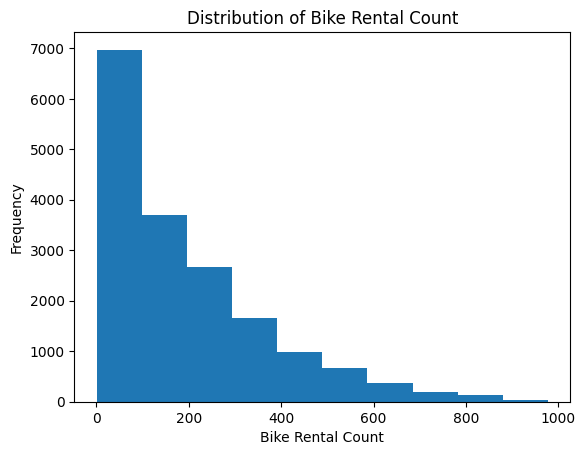

C:\Users\Samuel Dekpey\AppData\Local\Temp\ipykernel_19584\1577121533.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


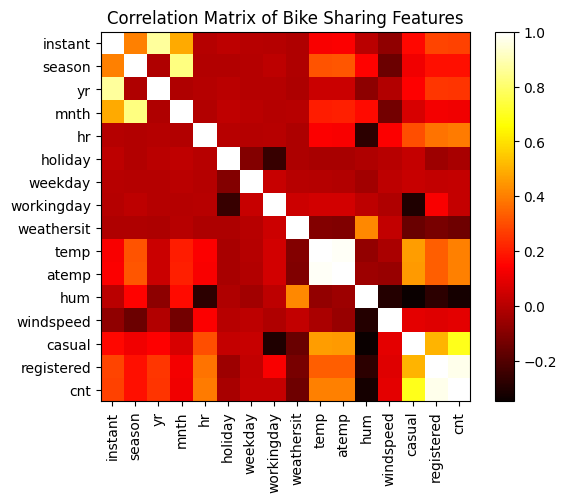

In [13]:
# plot the distribution of the target variable, 'cnt'
#cnt : count of total rental bikes including both casual and registered

plt.hist(df['cnt'])
plt.xlabel('Bike Rental Count')
plt.ylabel('Frequency')
plt.title('Distribution of Bike Rental Count')
plt.show()

# plot the correlation matrix
corr_matrix = df.corr()
plt.imshow(corr_matrix, cmap='hot', interpolation='nearest')
plt.title('Correlation Matrix of Bike Sharing Features')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()


### Data Preprocessing

In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# define the columns to be encoded and scaled
cat_cols = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
num_cols = ['temp', 'atemp', 'hum', 'windspeed']

# define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat_cols),
        ('num', StandardScaler(), num_cols)
    ])

# fit and transform the data
X = df.drop(['instant', 'dteday', 'casual', 'registered', 'cnt'], axis=1)
y = df['cnt']
X_preprocessed = preprocessor.fit_transform(X)


###  Split the Data into Train and Test Sets

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

### Train and Evaluate the Model

In [22]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Define the polynomial degree
degree = 2

# Create a polynomial features
poly = PolynomialFeatures(degree)

# Fit and transform the training data using the polynomial features object
X_train_poly = poly.fit_transform(X_train)

# Fit a Ridge regression model on the transformed training data
alpha = 1.0  # regularization parameter
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_poly, y_train)

# Transform the test data using the same polynomial features object
X_test_poly = poly.transform(X_test)

# Make predictions on the test set
y_pred = ridge.predict(X_test_poly)

# Evaluate the model using the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)


MSE:  20174.860692607563
